1. 召回数量不一，你是如何补足那些不足50个的召回的
2. 我的代码有些问题，评估的结论不对劲，可以帮我看下嘛？
3. 如何标记负样本的相关性？

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [50]:
user_path='../../user_data/'
import pandas as pd
binn=pd.read_pickle(user_path+'r_list_binn_0527.pkl')[0]
binn.head(3)
itemcf=pd.read_pickle(user_path+'r_list_itemcf_0527.pkl')[0]
itemcf.head(3)
yulao=pd.read_pickle(user_path+'r_list_itemcf_yulao_0527.pkl')[0]
yulao.head(3)

df_list=[binn,itemcf,yulao]

for df in df_list:
    df['hit']= (df.item_id_pred == df.item_id_true).astype(int)
    df.loc[df['hit']==1,'hit'].sum() /1821

,user_id,item_id_pred,score,rank,item_id_true
0,11,79868,2.023002,1,8052
1,11,19326,1.751268,2,8052
2,11,17287,1.425897,3,8052


,user_id,item_id_pred,score,rank,item_id_true
410,11,79868,6.019197,1,8052
1501,11,15844,5.328522,2,8052
457,11,10528,5.246875,3,8052


,user_id,item_id_pred,score,rank,item_id_true
0,1133,96668,0.130066,1.0,92902
1,1133,95025,0.122496,2.0,92902
2,1133,88942,0.120568,3.0,92902


0.1828665568369028

0.19549697968149368

0.18451400329489293

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

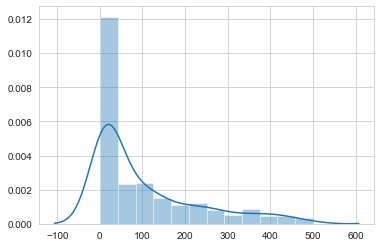

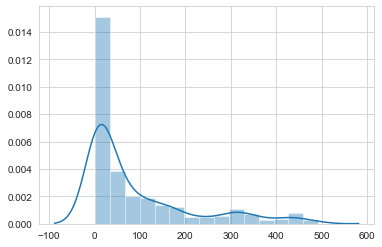

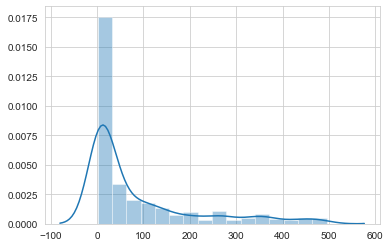

In [44]:
for df in df_list:
    temp=df.loc[df['hit'] == 1,'rank']
    plt.figure()
    sns.distplot(temp.values)

In [47]:
df.loc[df['rank'] == 1,'rank']

410     1
438     1
1269    1
830     1
110     1
       ..
646     1
178     1
921     1
479     1
795     1
Name: rank, Length: 1663, dtype: int64

In [54]:
len(value_rank1)

333

In [55]:
len( df.loc[df['rank'] == 1,'rank'])

1663

In [53]:
for df in df_list:
    value_rank1=df.loc[df.hit == 1,'rank'].values
    df.loc[df['rank'] == 1,'rank']=value_rank1
    df.loc[df.hit ==1 ,'rank'] = 1

ValueError: Must have equal len keys and value when setting with an iterable

In [41]:
df

,user_id,item_id_pred,score,rank,item_id_true,hit
0,1133,96668,0.130066,NaN,92902,0
1,1133,95025,0.122496,2.0,92902,0
2,1133,88942,0.120568,3.0,92902,0
3,1133,92741,0.114720,4.0,92902,0
4,1133,77052,0.099954,5.0,92902,0
...,...,...,...,...,...,...
728467,23144,77820,-0.015634,39.0,85765,0
728468,23144,91619,-0.016105,40.0,85765,0
728469,23144,78033,-0.040695,41.0,85765,0
728470,23144,28724,-0.061288,42.0,85765,0


In [ ]:
'''
In order to do ranking, we can use LambdaRank as objective function. LambdaRank has proved to be very effective on optimizing ranking functions such as nDCG. 
'''
import lightgbm as lgb
gbm = lgb.LGBMRanker(objective='lambdarank')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)
query_train = [X_train.shape[0]]
query_val = [X_val.shape[0]]
query_test = [X_test.shape[0]]
gbm.fit(X_train, y_train, group=query_train,
        eval_set=[(X_val, y_val)], eval_group=[query_val],
        eval_at=[50,100, 150], early_stopping_rounds=50)
X_test["predicted_ranking"] = test_pred
X_test.sort_values("predicted_ranking", ascending=False)